In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.express as px
#from plotly import tools
#import plotly.figure_factory as ff

%matplotlib inline
init_notebook_mode(connected = True)

In [46]:
df = pd.read_excel('Выборка_Казань.xlsx', sheet_name = 0)

In [10]:
df = df[df['Мусор'] == 0]
df = df[df['outlier'] == 0]
df = df[df['dup'] == 0]
df = df[df['Многоуровневость'] == 0]
df = df[df['Терраса'] == 0]
df.reset_index(drop = True , inplace = True )
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Широта,Сцепка_к,Unnamed: 63,ПОИСК,Текст,Ремонт,Общая площадь,Год постройки,Этаж/Этажность,Ссылка
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,55.852829,49.063304 55.852829,4.0,0.0,Продаю 1к квартиру-студию 27 квм в новом ЖК Но...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,55.689431,49.206271 55.689431,3.0,0.0,Срочная Продажа Новой Квартиры- Студиипродаетс...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,55.784501,49.193946 55.784501,32.0,0.0,Продается однокомнатная квартира по адресу Аль...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,55.869248,49.09223 55.869248,45.0,0.0,Продается просторная однокомнатная квартира на...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,55.795767,49.207753 55.795767,61.0,0.0,Продаётся просторная евро двухкомнатная в ЖК С...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,55.777125,49.216709 55.777125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/3-k._kvart...
9531,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
9532,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
9533,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...


In [11]:
df.columns

Index(['ID', 'Мусор', 'dup', 'outlier', 'out_PCA', 'Цена', 'Цена_перв',
       'LN(Цена)', 'BC(Цена)', 'Цена_перв.1', 'Цена(кв.м)', 'Цена(кв.м)_ln',
       'Прогноз', 'кв.м', 'MAE', 'MAPE', 'out', 'Исп', 'Комм', 'ОПлощадь',
       'Этаж_1', 'Этаж_2', 'Этаж_3', 'Этаж_4', 'Этажность_1', 'ГП_1', 'ГП_2',
       'Неточности', 'ГП', 'Unnamed: 29', 'Unnamed: 30', 'Разница', 'Испол',
       'Ремонт_1', 'Ремонт_2', 'Раст_центр_1', 'Раст_центр_2', 'Раст_метро_1',
       'Раст_метро_2', 'Районы_1', 'Районы_2', 'Районы_3', 'Районы_4',
       'Районы_5', 'Районы_6', 'Medians', 'ЖК_БД', 'ЖК_БД_ч',
       'Многоуровневость', 'Терраса', 'Вид_1', 'Вид_2', 'DB', 'KM',
       'Аварийноть', 'Проверка', 'Инфо', 'Адрес_1', 'Адрес_2', 'Адрес_Ya',
       'Долгота', 'Широта', 'Сцепка_к', 'Unnamed: 63', 'ПОИСК', 'Текст',
       'Ремонт', 'Общая площадь', 'Год постройки', 'Этаж/Этажность', 'Ссылка'],
      dtype='object')

In [44]:
#plt.figure(figsize = (20, 20))

trace1 = go.Scatter3d(
                      x = df['ОПлощадь'],                                                      #Ось X
                      y = df['Цена'],                                                          #Ось Y
                      z = df['ГП_2'],                                                          #Ось Z
                      mode = 'markers',
                      marker = dict(
                                    color = df['Районы_5'].astype(int),
                                    colorscale = 'Viridis',                                    #тут выбираем палитру (набор цветов), см. ниже примеры
                                    colorbar = dict(
                                                    title = 'Районы_5',                        #название цветовой шкалы
                                                    tickvals = df['Районы_5'].astype(int)      #colorbar создает цветовую шкалу
                                                   ),
                                    size = 3,                                                  #размер точек на графике
                                    line = dict(
                                                color = df['Районы_5'].astype(int),
                                                width = 0
                                               ),
                                    opacity = 0.8                                              #прозрачность точек
                                   )
                     )

df1 = [trace1]

layout = go.Layout(
                   #title = 'Название графика',
                   width = 800,                                                                #ширина графика
                   height = 800,                                                               #высота графика
                   margin = dict(
                                 l = 0,
                                 r = 0,
                                 b = 0,
                                 t = 0  
                                ),
                   scene = dict(
                                xaxis = dict(title  = 'Площадь'),                              #названия осей
                                yaxis = dict(title  = 'Цена'),
                                zaxis = dict(title  = 'ГП_2')
                               )
                  )

fig = go.Figure(
                data = df1, 
                layout = layout,
                #layout_title_text = 'Название графика'
               )

fig.update_layout(
                  title = 'Название графика',                                                 #название графика
                  title_x = 0,                                                                #положение названия по горизонту
                  title_y = 0.97                                                              #положение названия по вертикали
                 )

py.iplot(fig)

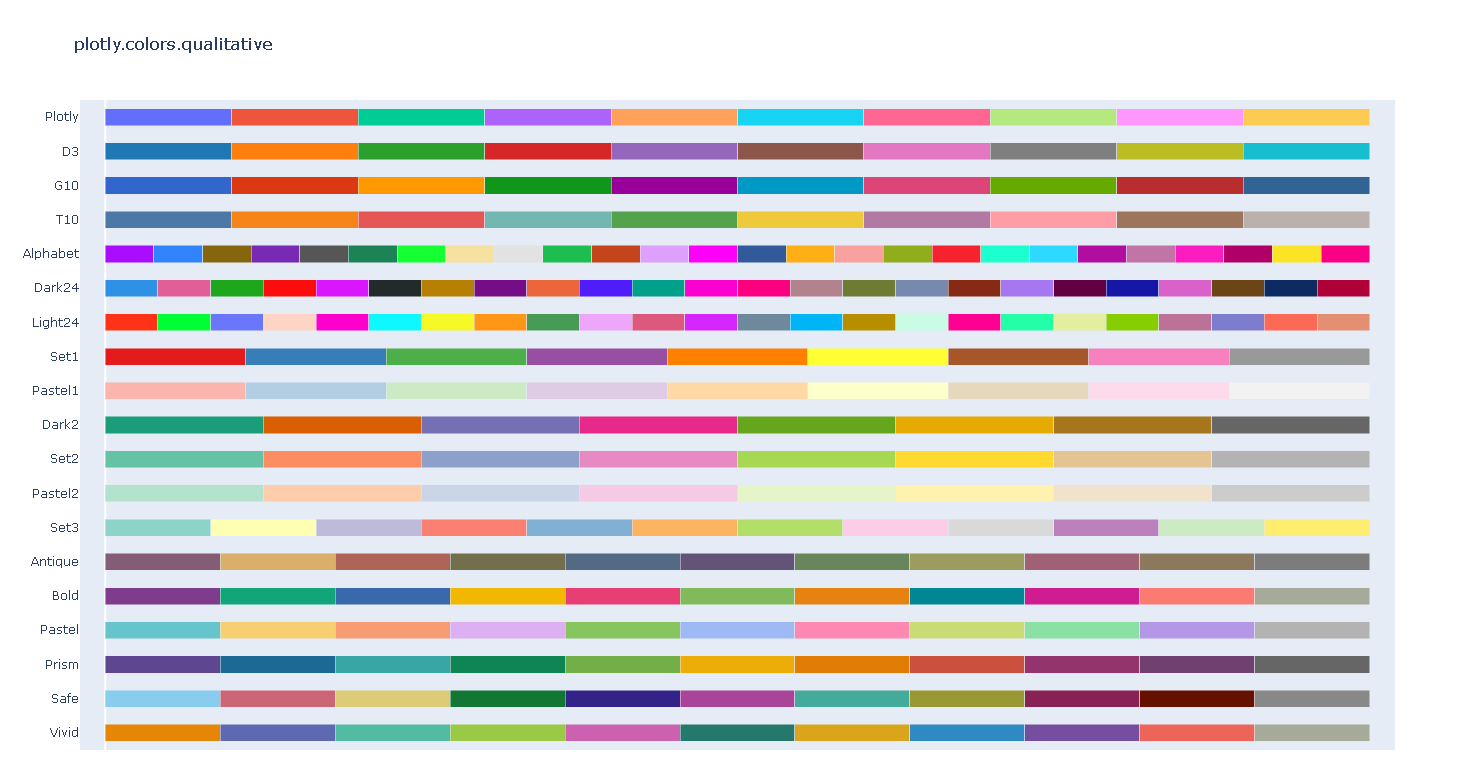

In [40]:
fig = px.colors.qualitative.swatches()
fig.show()

fig.update_layout(): Обновляем layout фигуры.
title = '3D-диаграмма рассеяния': Задаем текст заголовка.
title_x = 0.5: Центрируем заголовок.
title_y = 0.95: Устанавливает вертикальное положение заголовка. Значение 0.95 означает, что заголовок будет располагаться практически у верхнего края графика.

Важно:
• Центрирование: Параметр title_x может принимать значения от 0 до 1 (0 - левый край, 1 - правый край). Значение 0.5 соответствует середине.
• Шрифт: Вы можете изменить шрифт заголовка, используя параметр title_font в fig.update_layout():
fig.update_layout(title = '3D-диаграмма рассеяния', title_font = dict(size = 20, family = 'Arial'))

Другие параметры: В fig.update_layout() доступны и другие параметры для настройки графика, например: xaxis_title, yaxis_title, zaxis_title, margin, legend, и т.д.

Измените размер и стиль заголовка: Используйте параметры title_font_size, title_font_color и title_font_family для настройки внешнего вида заголовка.
Добавьте подзаголовок: Используйте fig.update_layout(title_text="Заголовок", title_font_size=24, title_y=0.95, title_x=0.5, title_font_family='Arial', title_font_color='blue')
Установите заголовок для конкресной оси: Используйте fig.update_xaxes(title_text="Ось X"), fig.update_yaxes(title_text="Ось Y") и fig.update_zaxes(title_text="Ось Z"). 